# PREAMBLE
#### Some prelimiar configurations are made here, before importing the libraries and starting the code.

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

In [2]:
palette = ['#dfc27d', '#a6611a']
palette_inv = ['#a6611a', '#dfc27d']

# Libraries

In [3]:
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import seaborn              as sns
import os

In [46]:
ppxf_psm_high_addpolynom = pd.read_csv('../../LargeFilesResults/PSM_analysis/veldisp_d100_m50_matched.csv')
# ppxf_psm_high_addpolynom.drop(['0'], axis=1)

In [48]:
uvup = ppxf_psm_high_addpolynom[ppxf_psm_high_addpolynom['UV_CLASS_YI2011']=='UV_UPTURN']
uvwk = ppxf_psm_high_addpolynom[ppxf_psm_high_addpolynom['UV_CLASS_YI2011']=='UV_WEAK']

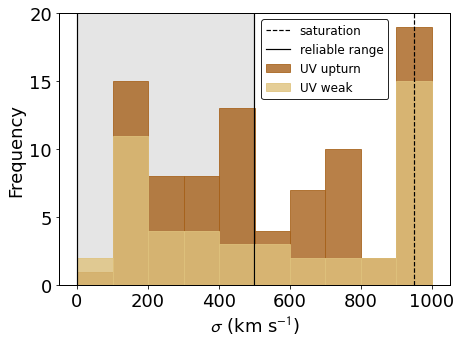

In [97]:
plt.rcParams.update(plotpars)
n, bins, patches = plt.hist(uvup['VEL_DISP'], bins=10, color=palette[1], alpha=0.8, label='UV upturn', 
                            edgecolor=palette[1])
plt.hist(uvwk['VEL_DISP'], bins=bins, color=palette[0], alpha=0.8, label='UV weak', edgecolor=palette[0])
plt.axvline(x=950, label='saturation', linestyle='--', color='black', lw=1.2)
plt.axvline(x=0, label='reliable range', linestyle='-', color='black', lw=1.2)
plt.axvline(x=500, linestyle='-', color='black', lw=1.2)
plt.fill_betweenx(y=np.arange(0,30), x1=0, x2=500, color='gray', alpha=0.2)
plt.ylabel("Frequency")
plt.xlabel(r"$\sigma$ (km s$^{-1}$)")
plt.legend(loc='upper center', bbox_to_anchor=(0.68, 1))
plt.ylim([0,20])

plt.savefig('../../LargeFilesResults/PSM_analysis/d100m50/veldisp_distrib.png')
plt.savefig('../../LargeFilesResults/PSM_analysis/d100m50/veldisp_distrib.pdf')
plt.show()

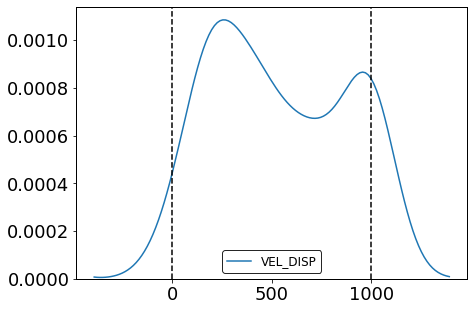

In [77]:
sns.kdeplot(ppxf_psm_high_addpolynom['VEL_DISP'])
plt.axvline(x=0, linestyle='--', color='black')
plt.axvline(x=1000, linestyle='--', color='black')
plt.show()

In [70]:
plt.fill_betweenx??